# Predicting Heart Disease using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
filepath = r"C:\Users\K Sharanya\Downloads\heart.csv"

In [4]:
df = pd.read_csv(filepath)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Feature Selection

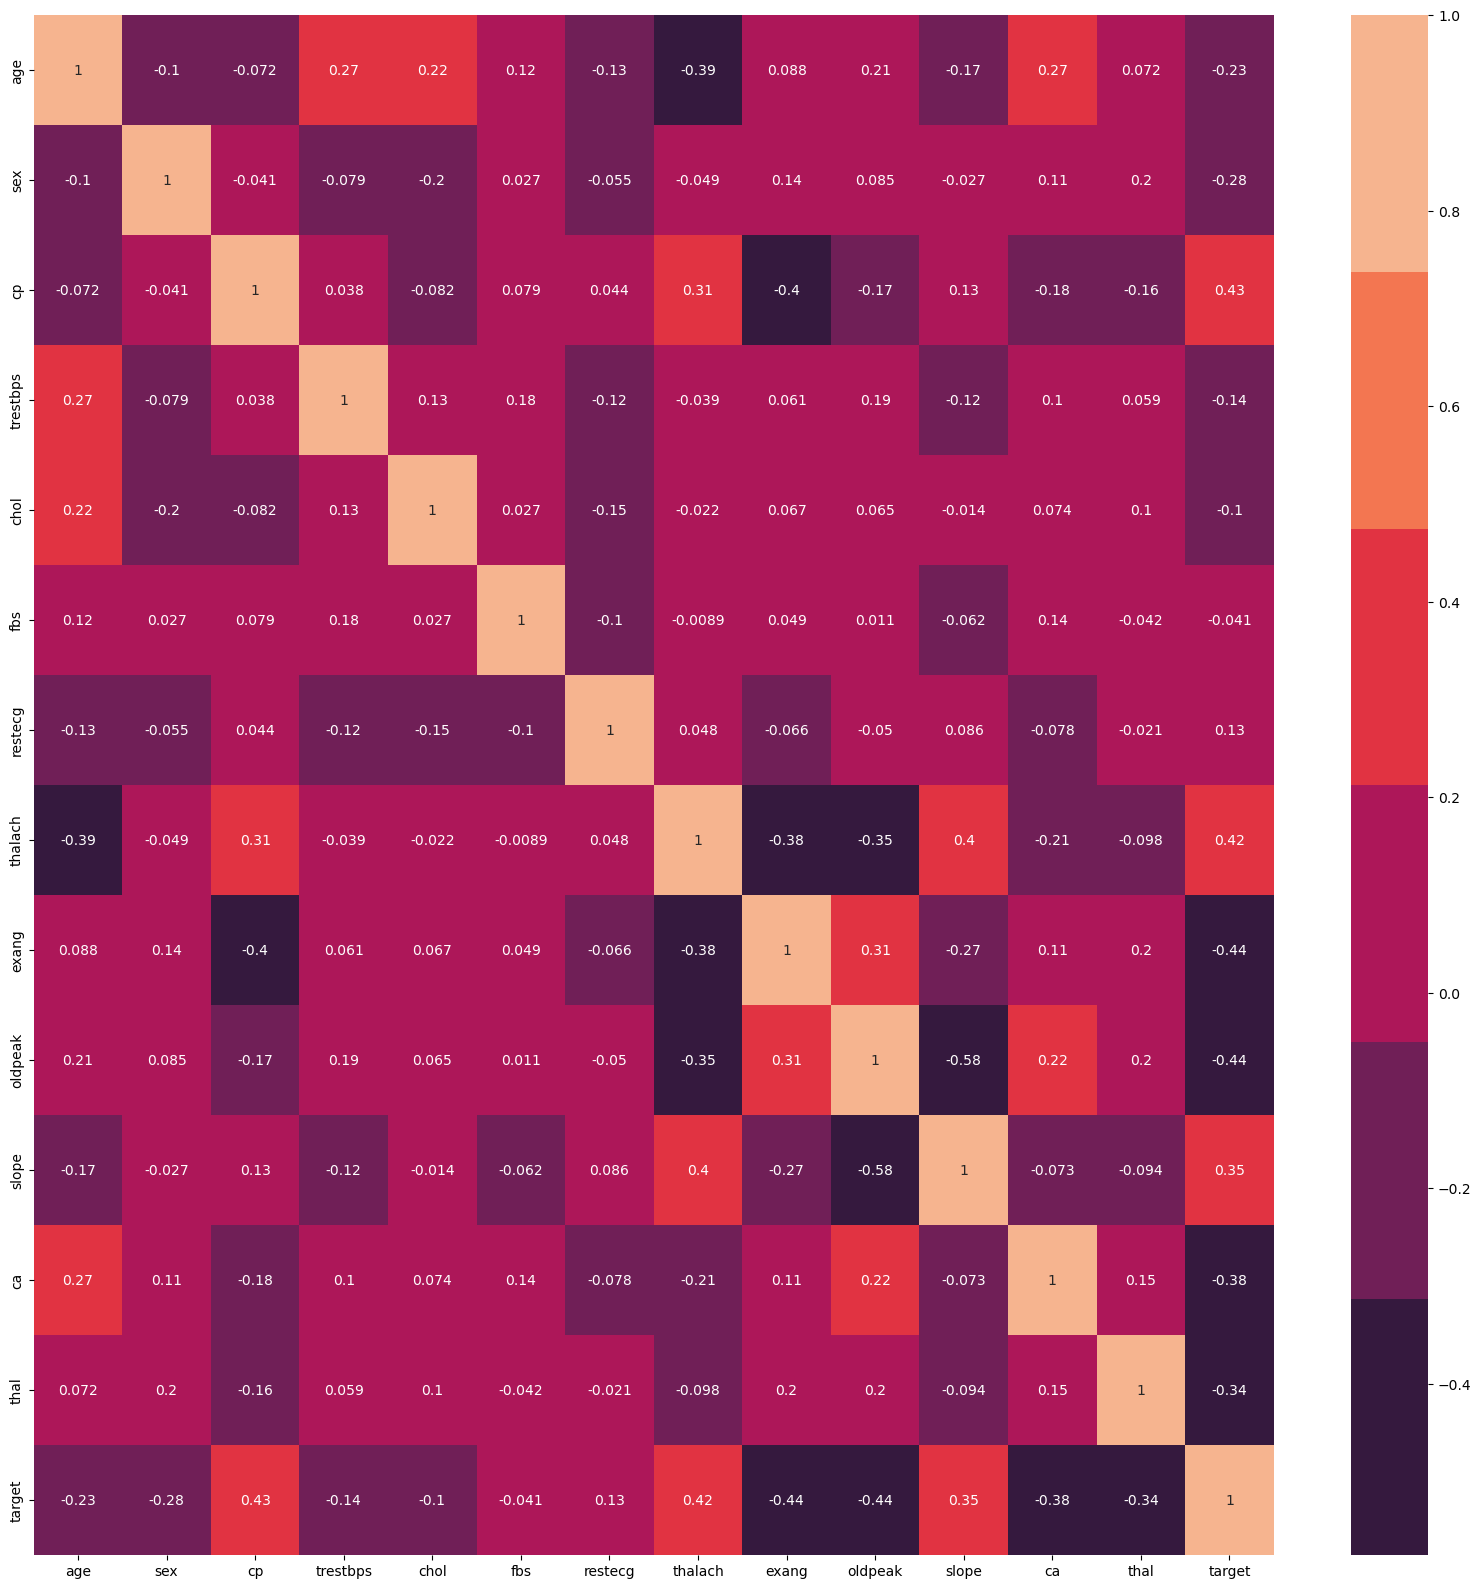

In [7]:
import seaborn as sns
corr_matrix = df.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix.loc[top_corr_features, top_corr_features], annot=True, cmap=sns.color_palette("rocket"))
plt.show()

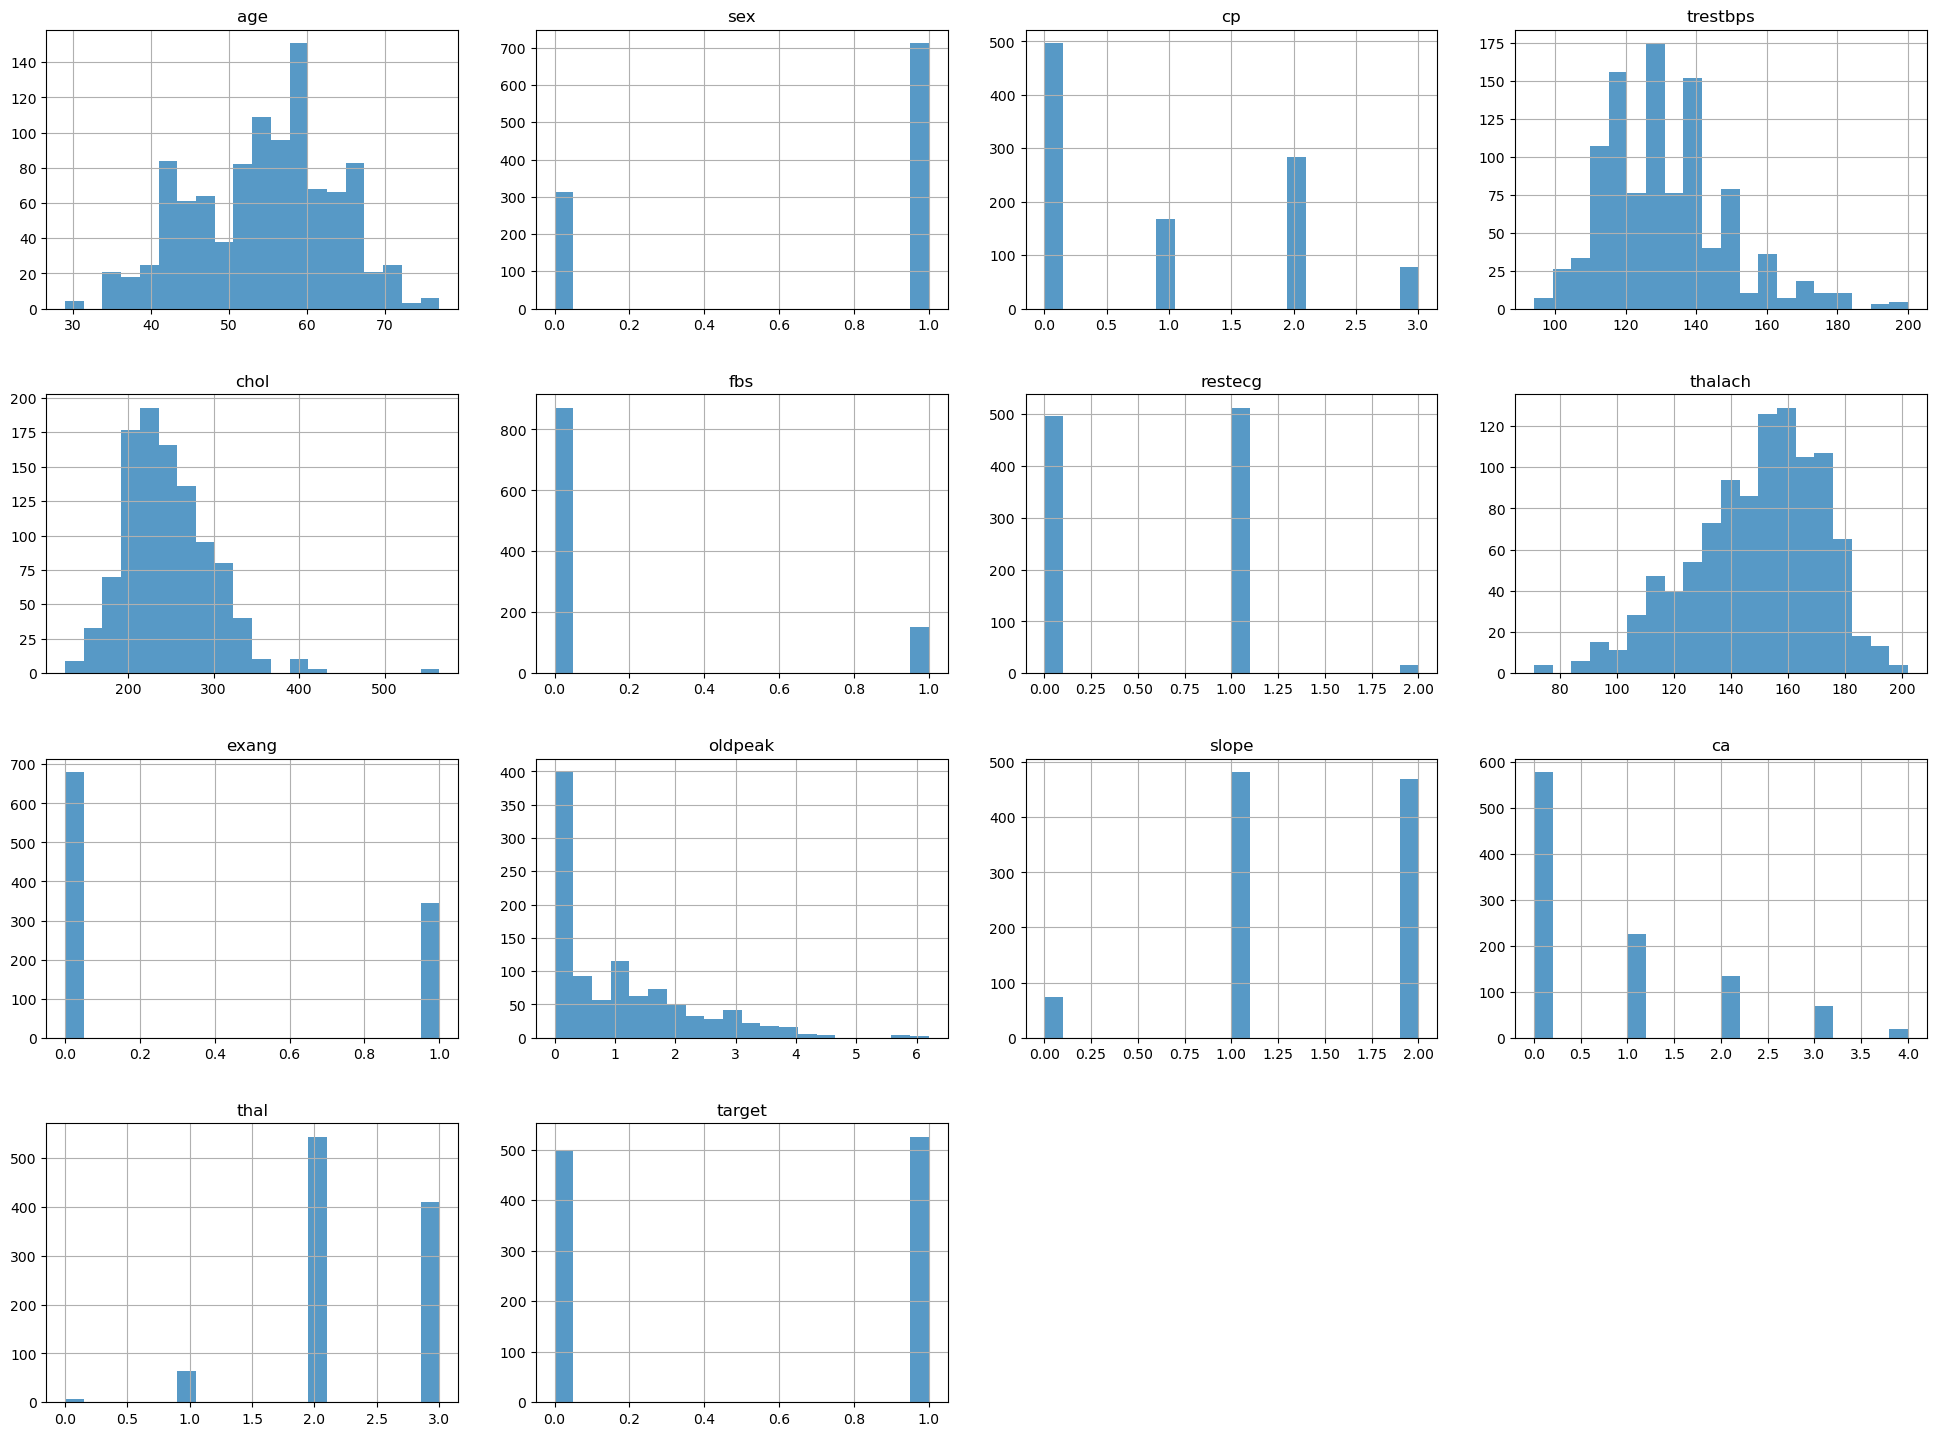

In [8]:
# Set the size of the figure and the layout for the histograms
df.hist(figsize=(20, 15), layout=(4, 4), bins=20, alpha=0.75)

# Adjust the layout and add padding to prevent overlap
plt.tight_layout(pad=3.0)
plt.show()

<Axes: xlabel='target', ylabel='count'>

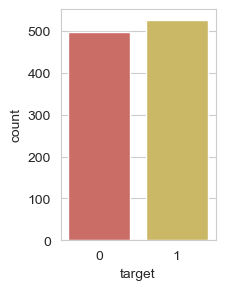

In [9]:
plt.figure(figsize=(2,3))
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette=sns.color_palette("hls", 8))

Convert categorical variables into dummy variables and scale all the values before training the Machine Learning models:

In [10]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [13]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [14]:
X = dataset.drop(['target'], axis = 1)
y = dataset['target']

In [15]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier, X, y, cv=10)
    knn_scores.append(score.mean())

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
knn_scores = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    

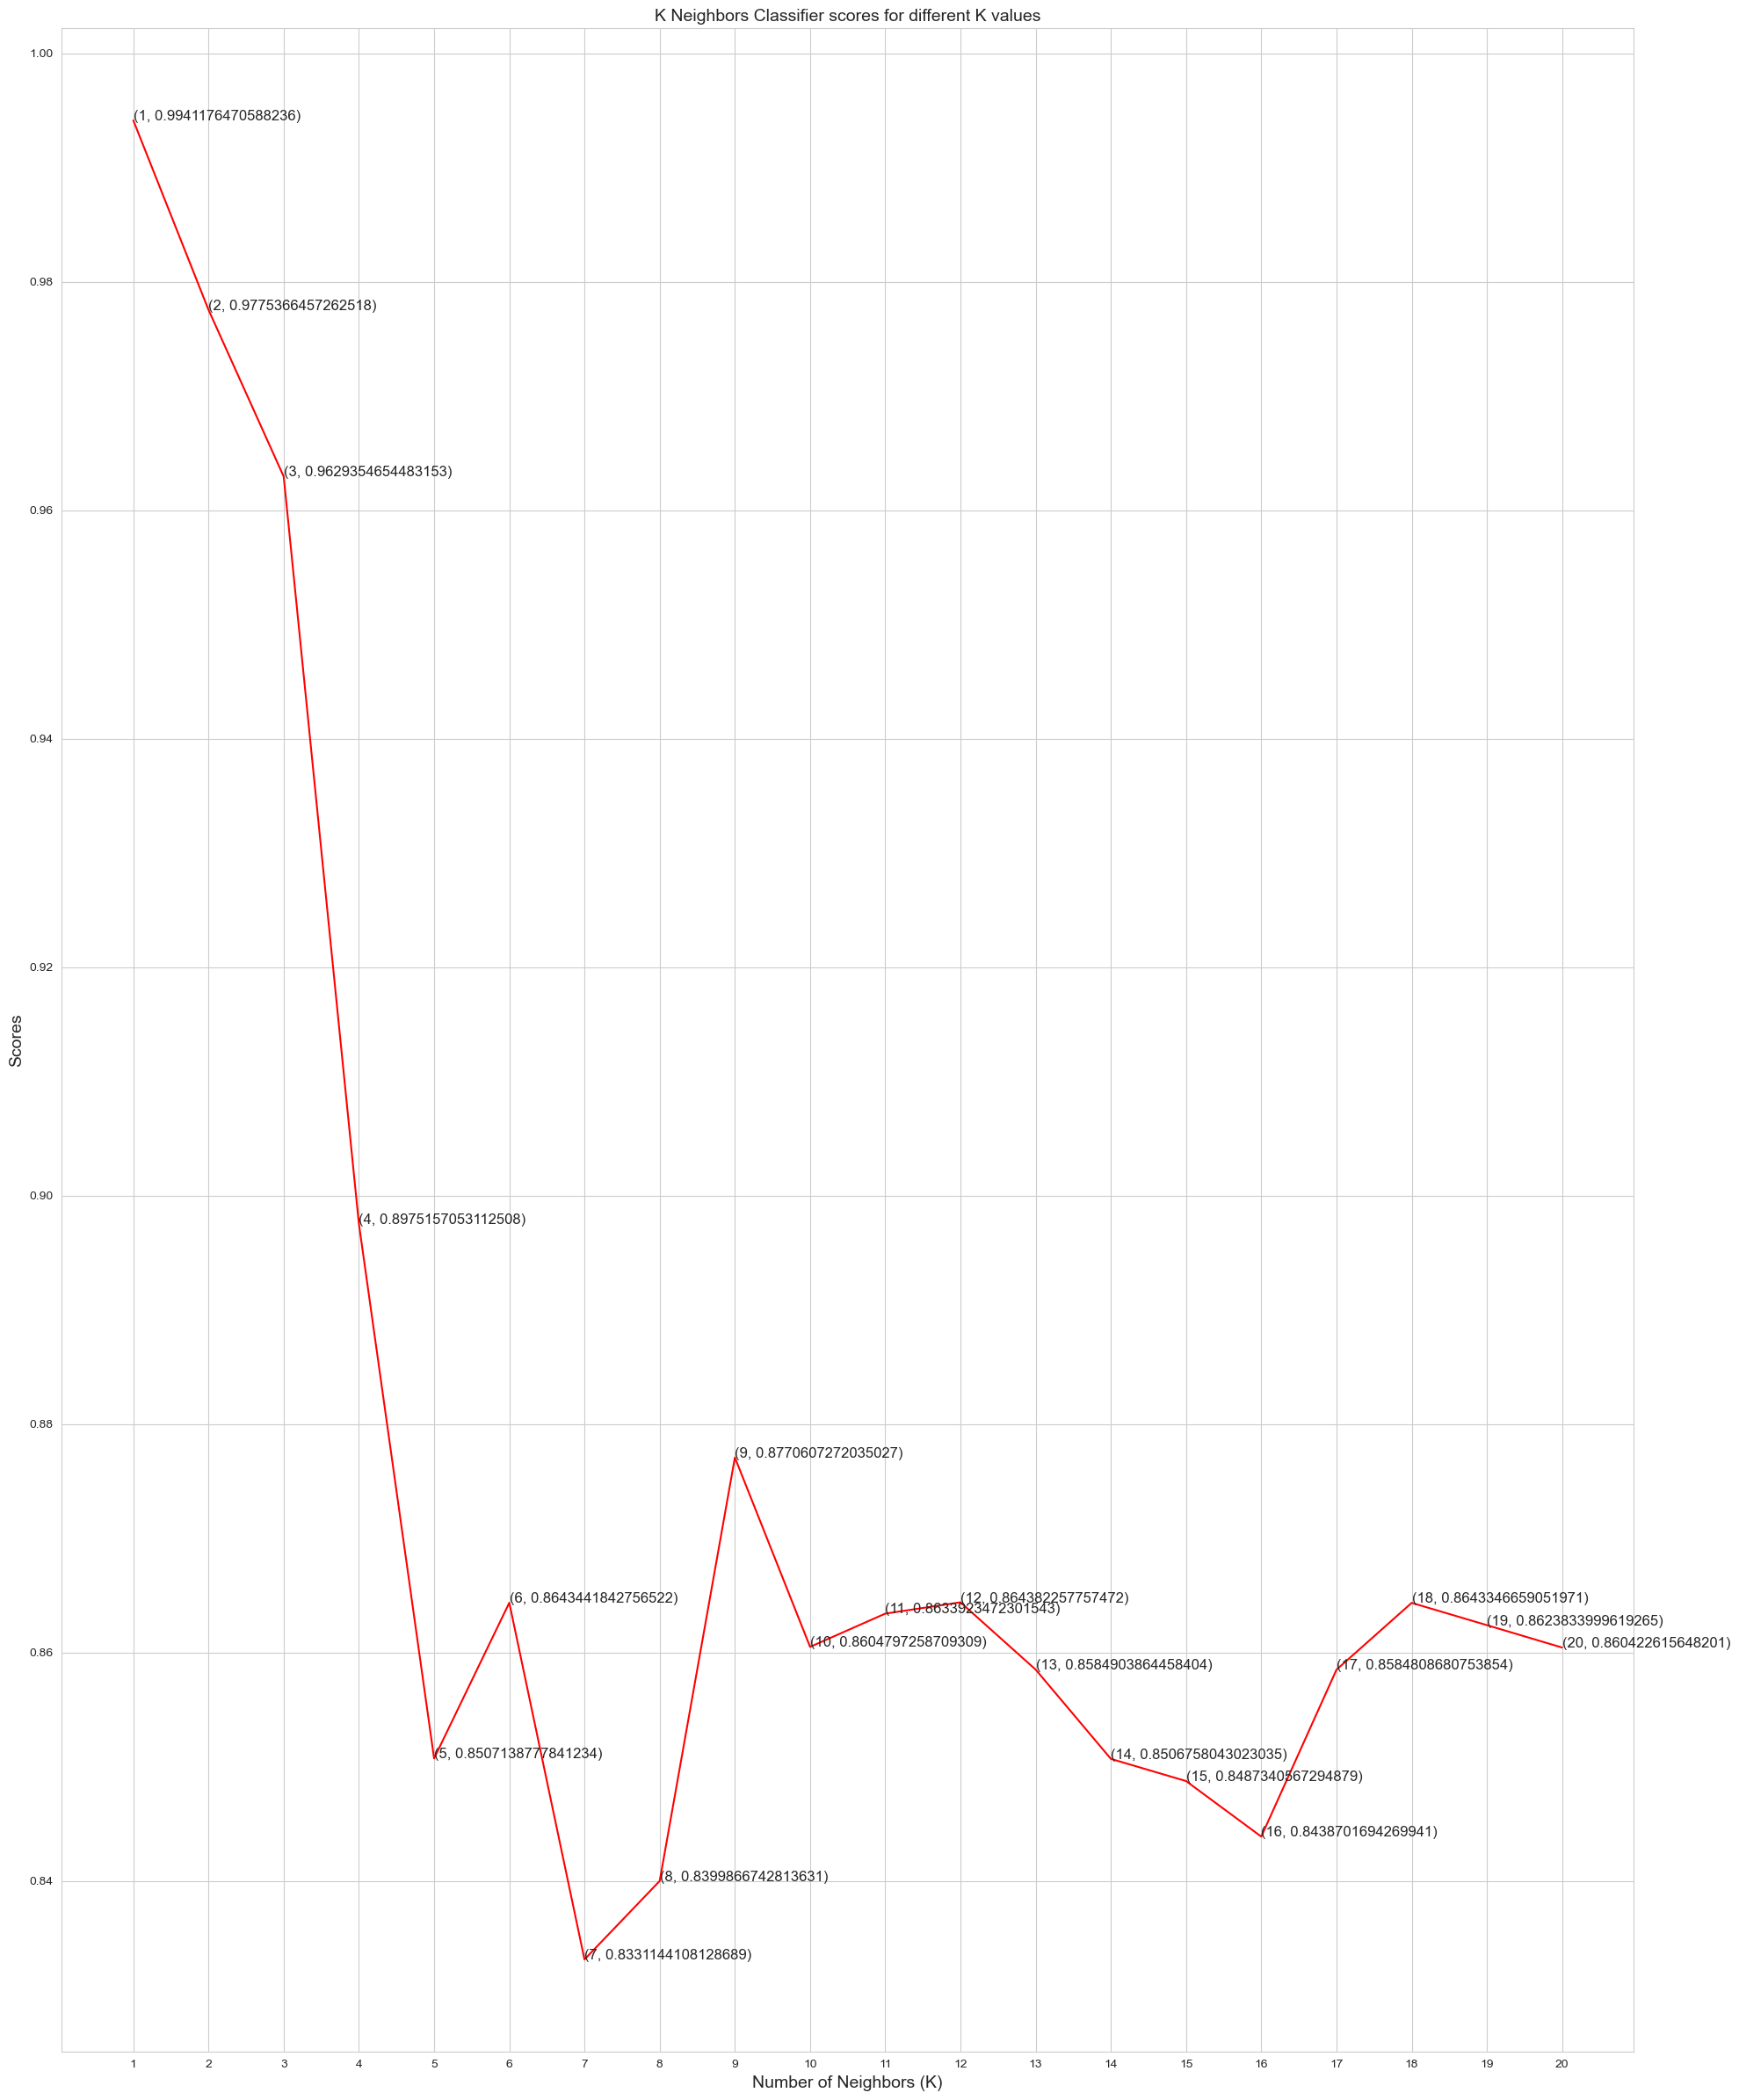

In [18]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())
plt.figure(figsize=(20,24)) 
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]), fontsize=12)
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('K Neighbors Classifier scores for different K values', fontsize=14)
plt.tight_layout()  
plt.savefig('knn_score.png', dpi=300, bbox_inches='tight')

In [19]:
# using value with higher accuracy
knn_classifier2 = KNeighborsClassifier(n_neighbors = 2)
score2=cross_val_score(knn_classifier,X,y,cv=10)
score2.mean()

0.860422615648201

### Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)
rf_score=cross_val_score(randomforest_classifier,X,y,cv=10)
rf_score.mean()

0.9941462021701885

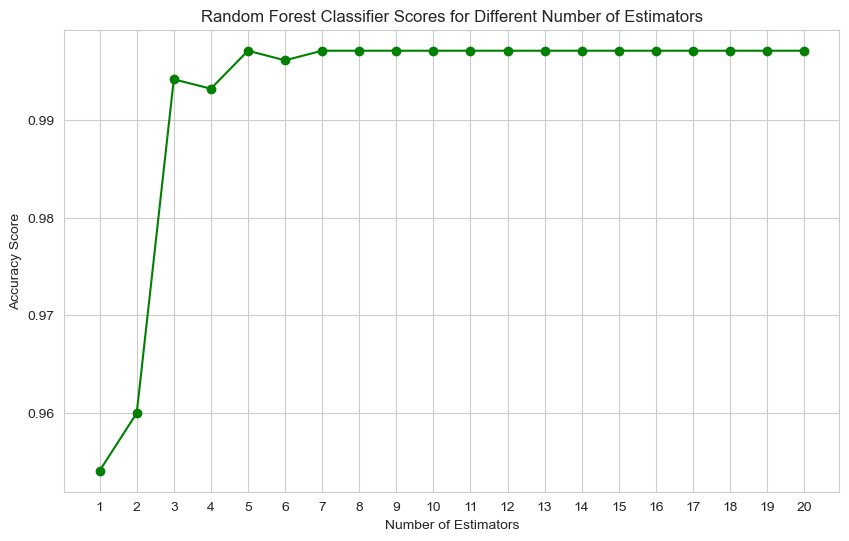

In [21]:
# Assuming 'X' is your feature set and 'y' is your target variable
rf_scores = []
estimators = range(1, 21)
for n in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(rf_classifier, X, y, cv=10)
    rf_scores.append(scores.mean())

# Plotting the scores
plt.figure(figsize=(10, 6))
plt.plot(estimators, rf_scores, color='green', marker='o')
plt.title('Random Forest Classifier Scores for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.xticks(estimators)
plt.savefig('rfc_score.png', dpi=300, bbox_inches='tight')
plt.show()

### Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_classifier = DecisionTreeClassifier()
dt_score = cross_val_score(decisiontree_classifier, X, y, cv=10)
print(f"Mean cross-validation score for Decision Tree Classifier: {dt_score.mean()}")

Mean cross-validation score for Decision Tree Classifier: 0.9970588235294118


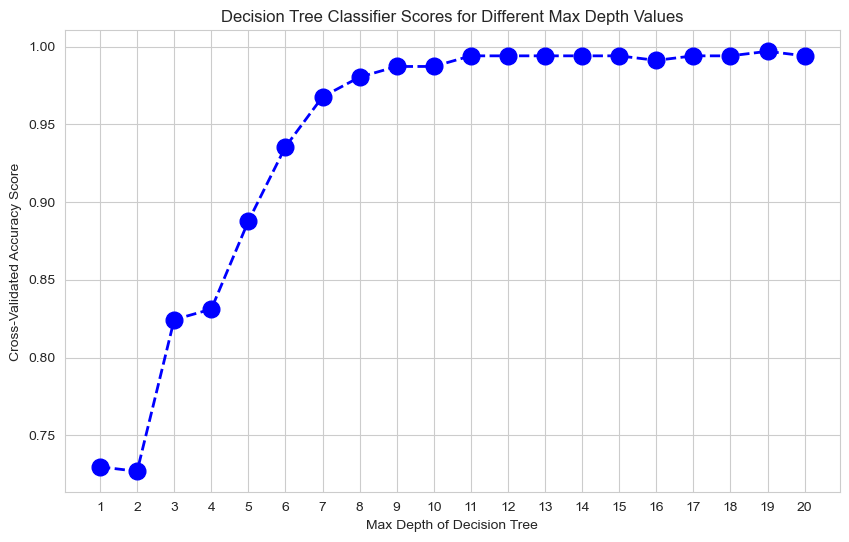

In [23]:
max_depth_range = range(1, 21)
dt_scores = []

for depth in max_depth_range:
    dt_classifier = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(dt_classifier, X, y, cv=10)
    dt_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, dt_scores, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.title('Decision Tree Classifier Scores for Different Max Depth Values')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Cross-Validated Accuracy Score')
plt.xticks(max_depth_range)
plt.grid(True)
plt.savefig('dtc_score.png', dpi=300, bbox_inches='tight')
plt.show()